In [2]:
import os
import re
import sys
import csv
import time
import json
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from scipy import optimize
from scipy.stats import chi2, norm
from scipy.integrate import quad
from scipy.special import erfinv

from sklearn.metrics.pairwise import pairwise_distances

import torch
import falkon

sys.path.insert(0, "../notebooks")
from plot_utils import plot_one_t, plot_two_t


In [3]:
def extract_Nsig(file:str):
    N_SIG = int(file[file.rfind('_sig_') + len('_sig_'):] ) 
    return N_SIG

In [4]:
def extract_Nsig_SO(file:str):
    matches = re.search(r'_sig_(\d+)_SOn', file)
    return int(matches.group(1))

# NEW tuning

$N_0 = 5000$\
$N(0) = 1000$ expected number of background events

# SHAPE and RENORMALIZATION
N(0) oscillateas a random poisson variable (80 toys)

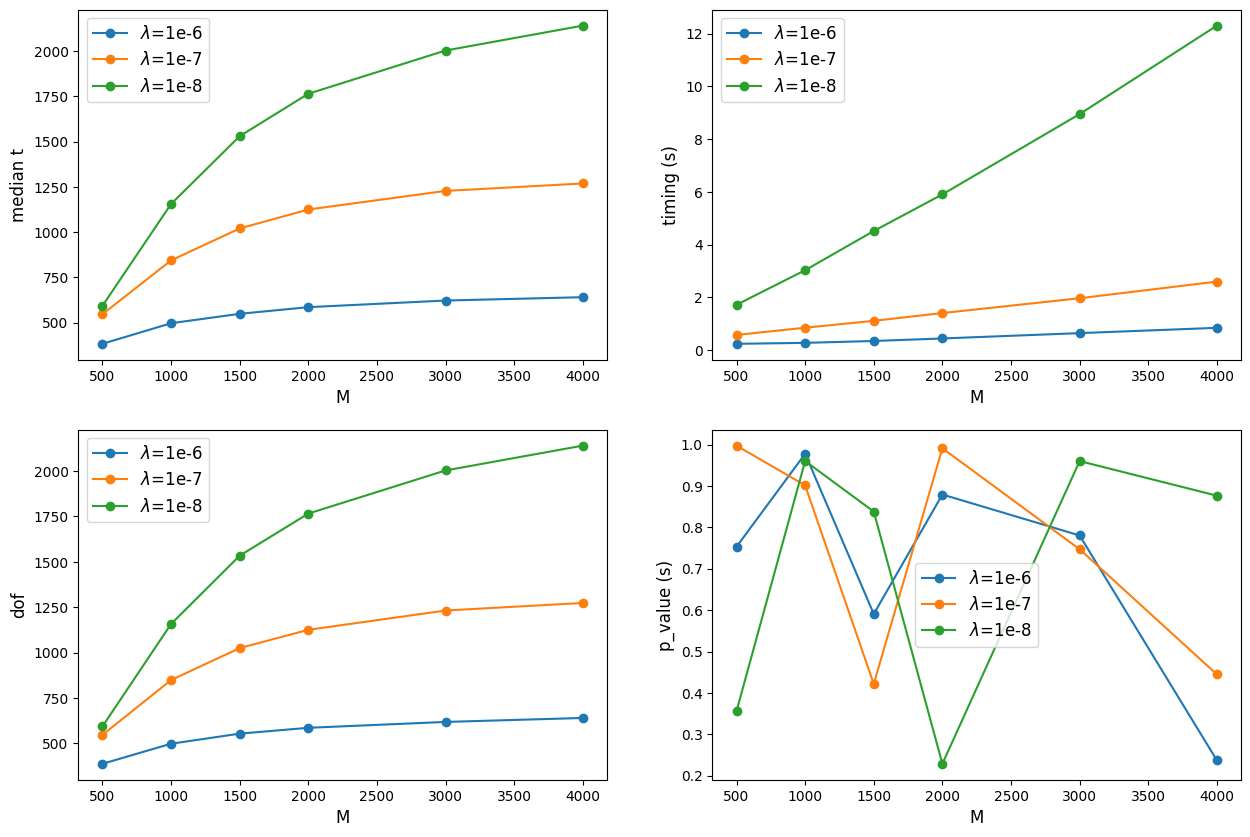

In [4]:
df_m = pd.read_csv("../output/bank_data/Shape_and_Renorm/results/2024_3_8_17_37_ref_5000_bkg_1000_sig_0.csv", sep="\t")

fig, ax = plt.subplots(figsize=(15,10), nrows=2, ncols=2)
df_m = df_m.sort_values('M', ascending =False)  

ax[0][0].plot(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['median'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[0][0].plot(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['median'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[0][0].plot(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['median'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[0][0].set_xlabel('M', fontsize=12)
ax[0][0].set_ylabel('median t', fontsize=12)
ax[0][0].legend(fontsize =12)

ax[0][1].plot(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['timing'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[0][1].plot(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['timing'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[0][1].plot(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['timing'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[0][1].set_xlabel('M', fontsize=12)
ax[0][1].set_ylabel('timing (s)', fontsize=12)
ax[0][1].legend(fontsize =12)

ax[1][0].plot(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['dof'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[1][0].plot(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['dof'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[1][0].plot(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['dof'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[1][0].set_xlabel('M', fontsize=12)
ax[1][0].set_ylabel('dof', fontsize=12)
ax[1][0].legend(fontsize =12)

ax[1][1].plot(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[1][1].plot(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[1][1].plot(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[1][1].set_xlabel('M', fontsize=12)
ax[1][1].set_ylabel('p_value (s)', fontsize=12)
ax[1][1].legend(fontsize =12)


### S&R best model


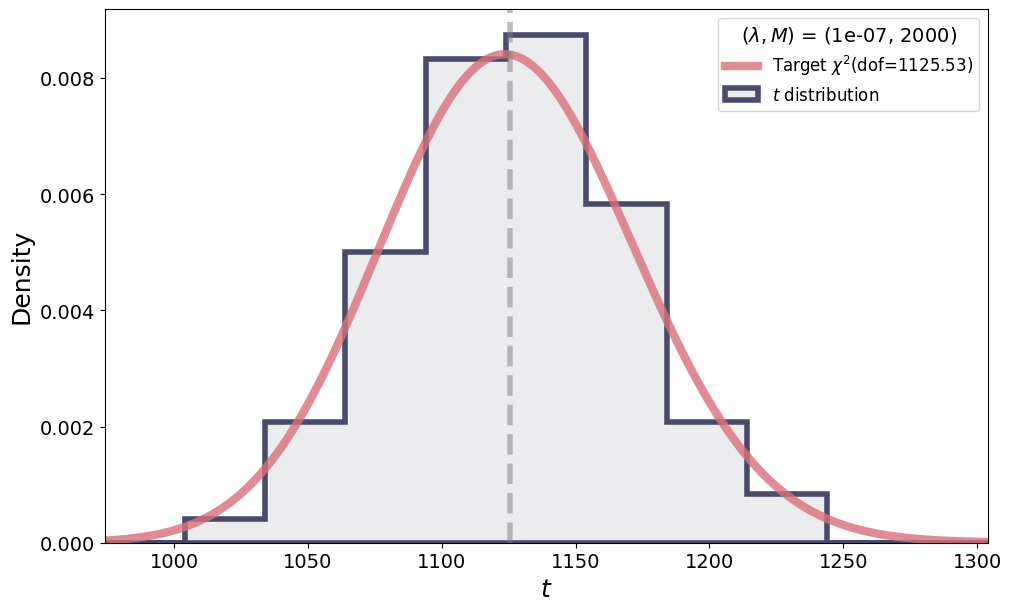

KS p value: 0.991


In [17]:
l=1e-7;     M=2000
with open('../output/bank_data/Shape_and_Renorm/2024_3_8_17_37_ref_5000_bkg_1000_sig_0/ttest_time_1e-07_2000.csv') as f:
    t_ref_final = np.array([float(row.split()[0]) for row in f])

df_fit_SR, loc, scale = chi2.fit(t_ref_final, floc=0, fscale=1)
t_ref_bins  = np.arange(int(np.min(t_ref_final))-50, int(np.max(t_ref_final))+100, 30)
xgrid_ref   = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 2)

ref_chi2 = chi2(df=df_fit_SR)

plot_one_t(
    t_distribution  = t_ref_final,
    t_bins          = t_ref_bins,
    chi2            = ref_chi2,
    chi2_grid       = xgrid_ref,
    show_hist       = True,
    show_error      = False,
    compute_rate    = False,
    err_marker      = "o",
    err_markersize  = 10,
    err_capsize     = 5,
    err_elinewidth  = 4,
    err_capthick    = 4,
    err_color       = "black",
    figsize         = (10, 6),
    fontsize        = 18,
    cms             = False,
    cms_label       = "",
    cms_rlabel      = "",
    hist_ecolor     = ("#494B69", 1.0),
    hist_fcolor     = ("#494B69", 0.1),
    chi2_color      = ("#D8707C", 0.8),
    hist_lw         = 4,
    chi2_lw         = 6,
    hist_type       = "stepfilled",
    hist_label      = "$\it{t}$ distribution",
    chi2_label      = "Target $\chi^2$(dof=%.2f)"%(df_fit_SR),
    xlabel          = r"$t$",
    ylabel          = "Density",
    show_plot       = True,
    save_plot       = False,
    plot_name       = "t_distribution_"+str(l)+"_"+str(M),
    plot_path       = "",
    plot_format     = "png",
    return_fig      = False,
    plot_params     = True,
    hyperparams     = str(l)+", "+str(M),
)
_, ks_p_value = stats.kstest(t_ref_final, "chi2", args=(df_fit_SR,))
print("KS p value:", np.around(ks_p_value, 4))


## SIGNAL $\neq$ 0

Expected signal event are: {10, 20, 30, 40, 50, 80, 100}\
The effective number of signal (which is added to N_bkg_obs) is not know a priori but oscillate as a poisson random having the rate = expected N_sig 


### Example of two distribution: $ p(t|H_0) $ vs $p(t|H_w)$

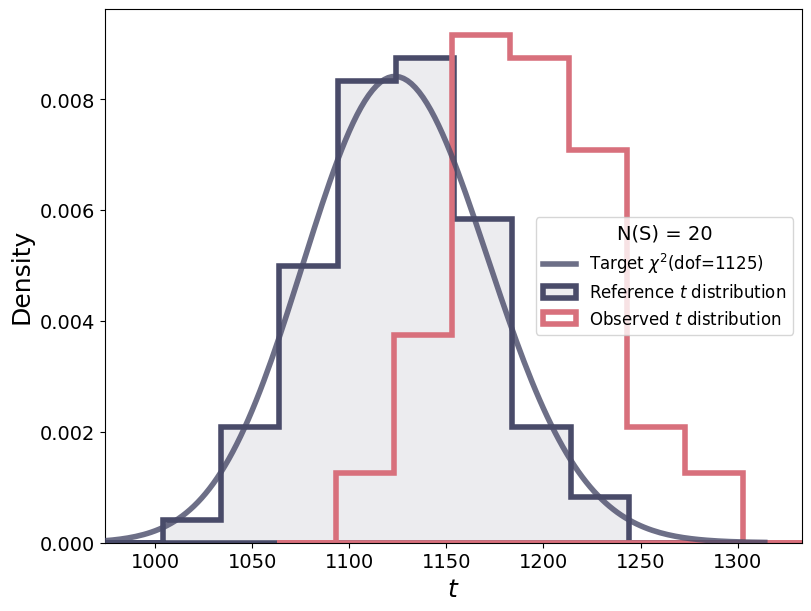

In [18]:
l=1e-7;     M=2000
with open("../output/bank_data/Shape_and_Renorm/2024_3_9_14_48_ref_5000_bkg_1000_sig_20/ttest_time_1e-07_2000.csv") as f:
    t_data_final = np.array([float(row.split()[0]) for row in f])

t_data_bins = np.arange(int(np.min(t_data_final))-50, int(np.max(t_data_final))+50, 30)
xgrid_data  = np.arange(int(np.min(t_data_final))-50, int(np.max(t_data_final))+50, 2)

plot_two_t(
    t_distribution_1  = np.array(t_ref_final),
    t_bins_1          = t_ref_bins,
    t_distribution_2  = np.array(t_data_final),
    t_bins_2          = t_data_bins,
    chi2              = ref_chi2,
    chi2_grid         = xgrid_ref,
    show_error_1      = False,
    show_error_2      = False,
    show_hist_1       = True,
    show_hist_2       = True,
    compute_rate_1    = False,
    compute_rate_2    = False,
    err_marker_1      = "o",
    err_marker_2      = "o",
    err_markersize_1  = 10,
    err_markersize_2  = 10,
    err_capsize_1     = 5,
    err_capsize_2     = 5,
    err_elinewidth_1  = 4,
    err_elinewidth_2  = 4,
    err_capthick_1    = 4,
    err_capthick_2    = 4,
    figsize           = (8, 6),
    fontsize          = 18,
    cms               = False,
    cms_label         = "",
    cms_rlabel        = "",
    hist_ecolor_1     = ("#494B69", 1),
    hist_ecolor_2     = ("#D8707C", 1),
    hist_fcolor_1     = ("#494B69", 0.1),
    hist_fcolor_2     = ("#D8707C", 0),
    err_ecolor_1      = ("#494B69", 1),
    err_ecolor_2      = ("#D8707C", 1),
    chi2_color        = ("#494B69", 0.8),
    hist_lw_1         = 4,
    hist_lw_2         = 4,
    chi2_lw           = 4,
    hist_type_1       = "stepfilled",
    hist_type_2       = "stepfilled",
    hist_label_1      = "Reference $\it{t}$ distribution",
    hist_label_2      = "Observed $\it{t}$ distribution",
    chi2_label        = "Target $\chi^2$(dof=%i)"%(df_fit_SR),
    xlabel            = "$\it{t}$",
    ylabel            = "Density",
    show_plot         = True,
    save_plot         = False,
    plot_name         = "t_distribution_signal",
    plot_path         = "/home/ubuntu/NPLM-Falkon/output/bank_data/results/results.csv",
    plot_format       = "png",
    return_fig        = False,
    plot_params       = True,
    hyperparams       = str(l)+", "+str(M),
    N_SIG             = 20 
)


In [19]:
t_obs = np.median(t_data_final)
p_val = 1 - ref_chi2.cdf(t_obs)
print(1-chi2.cdf(np.median(t_data_final), df_fit_SR))
Z_obs     = norm.ppf(chi2.cdf(np.median(t_data_final), df_fit_SR))
t_obs_err = 1.2533*np.std(t_data_final)*1./np.sqrt(len(t_ref_final))
# Z_obs_p   = norm.ppf(chi2.cdf(np.median(t_data_final)+t_obs_err, df_fit_SR))
# Z_obs_m   = norm.ppf(chi2.cdf(np.median(t_data_final)-t_obs_err, df_fit_SR))
Z_obs_p   = norm.ppf(chi2.cdf(np.quantile(t_ref_final, 0.84),df_fit_SR))
Z_obs_m   = norm.ppf(chi2.cdf(np.quantile(t_ref_final, 0.16),df_fit_SR))

print('Z = %s (+%s/-%s)'%(str(np.around(Z_obs, 2)), str(np.around(Z_obs-Z_obs_p, 2)), str(np.around(Z_obs-Z_obs_m, 2))))
# print('Z = %s (+%s/-%s)'%(str(np.around(Z_obs, 2)), str(np.around(Z_obs_p, 2)), str(np.around(Z_obs_m, 2))))

0.05836912093995894
Z = 1.57 (+0.63/-2.5)


In [20]:
l = 1e-7; M=2000
OUTPUT_PATH = '../output/bank_data/Shape_and_Renorm/'
df_s = pd.DataFrame(columns=['N_sig', 'p_value', 'Z_obs','Z_obs_m', 'Z_obs_p', 'timing'])
folders = [OUTPUT_PATH+directory for directory in os.listdir(OUTPUT_PATH) if 'sig' in directory]
for dir in folders:
    N_sig = extract_Nsig(dir)
    if N_sig != 0:
        with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
            t_data = np.array([float(row.split()[0]) for row in f])
        with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
            t_timing = np.array([float(row.split()[1]) for row in f])

        '''ordinare e tirare fuori il numero di signal events e printare solo lo Z score'''
        # t_obs = np.quantile(t_data,0.5)
        t_obs = np.median(t_data)
        p_val = 1 - chi2.cdf(np.median(t_data), df_fit_SR)
        Z_obs     = norm.ppf(chi2.cdf(np.median(t_data), df_fit_SR))
        t_obs_err = 1.2533*np.std(t_data)*1./np.sqrt(len(t_data))
        Z_obs_p   = norm.ppf(chi2.cdf(np.quantile(t_data, 0.84),df_fit_SR))
        Z_obs_m   = norm.ppf(chi2.cdf(np.quantile(t_data, 0.16),df_fit_SR))
        df_s = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-Z_obs_m, Z_obs_p-Z_obs, np.mean(t_timing)]], columns=df_s.columns), df_s], ignore_index=True)

df_s = df_s.sort_values('N_sig', ascending =True, ignore_index=True)
df_s['p_value']     = df_s['p_value'].round(5)

pd.options.display.float_format = '{:,.4f}'.format
df_s.head(10)


/tmp/ipykernel_89311/121023660.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_s = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-Z_obs_m, Z_obs_p-Z_obs, np.mean(t_timing)]], columns=df_s.columns), df_s], ignore_index=True)


,N_sig,p_value,Z_obs,Z_obs_m,Z_obs_p,timing
0,10,0.3039,0.5132,0.9398,0.9817,1.3903
1,20,0.0584,1.5686,0.9357,0.6860,1.3846
2,30,0.0179,2.0991,0.8535,0.7768,1.4321
3,40,0.0019,2.8928,0.9060,0.7953,1.4492
4,50,0.0011,3.0601,0.8397,0.7312,1.4189
5,80,0.0000,5.1239,0.7235,0.9674,1.4528
6,100,0.0000,6.3988,1.0410,1.2639,1.4467


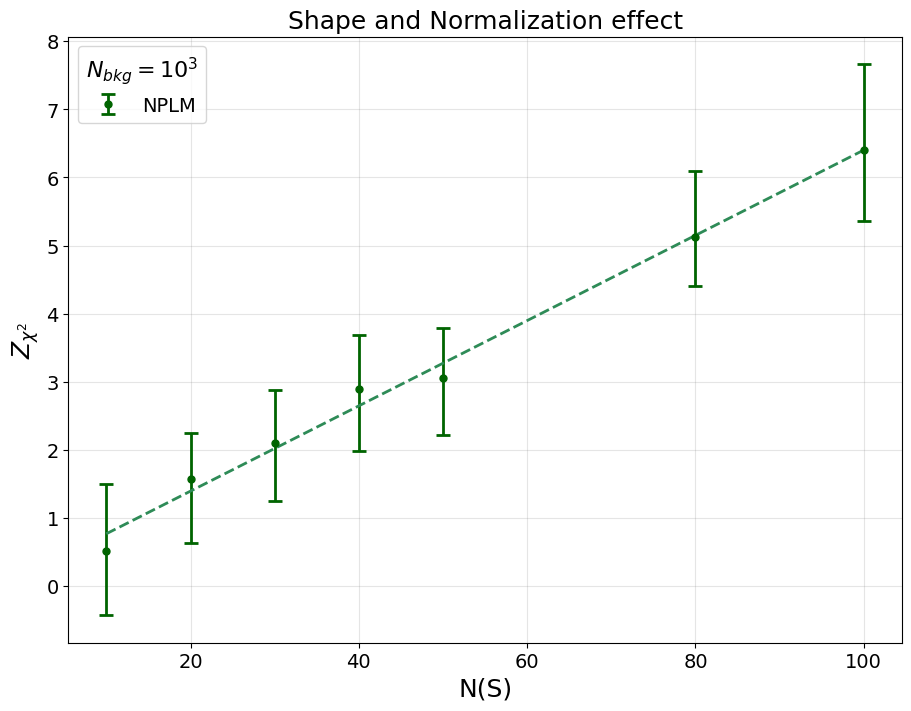

In [21]:
par ,_ = optimize.curve_fit(lambda x,m,q: m*x+q, df_s['N_sig'], df_s['Z_obs'])
m,q = par[0], par[1]

fig, ax = plt.subplots(figsize=(9,7), constrained_layout=True)
ax.set_title('Shape and Normalization effect', fontsize=18)
ax.tick_params(axis = "x", labelsize = 14, which = "major")
ax.tick_params(axis = "y", labelsize = 14, which = "major")
ax.set_xlabel('N(S)', fontsize = 18)
ax.set_ylabel('$Z_{\chi^2}$', fontsize = 18)
ax.errorbar(df_s['N_sig'], df_s['Z_obs'], yerr=np.array((abs(df_s['Z_obs_m']), df_s['Z_obs_p']), ndmin=2),
            label='NPLM',
            marker='o', lw=2, ls='', color='darkgreen',elinewidth=2, capsize=5, markersize=5, capthick=2)
ax.plot(df_s['N_sig'], m*df_s['N_sig']+q, lw=2, linestyle='--', color='seagreen')
ax.grid(color='grey', alpha=0.2, which='major')
ax.legend(fontsize=14, title='$N_{bkg}=10^3$', title_fontsize=16)

# SHAPE-ONLY
keep fixed N(R)

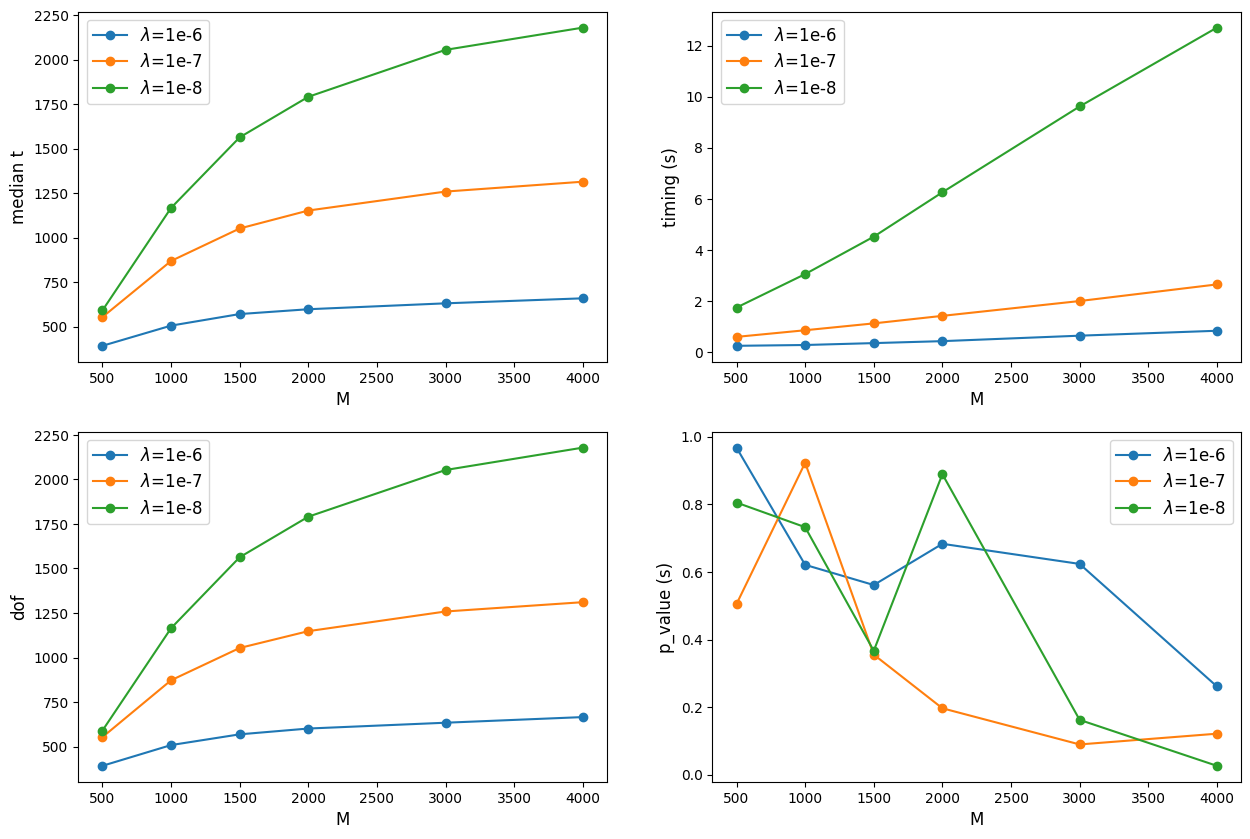

In [5]:
df_m = pd.read_csv("../output/bank_data/Shape_only/results/2024_3_8_18_40_ref_5000_bkg_1000_sig_0_SOn_0_SOn.csv", sep="\t")

fig, ax = plt.subplots(figsize=(15,10), nrows=2, ncols=2)
df_m = df_m.sort_values('M', ascending =False)  

ax[0][0].plot(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['median'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[0][0].plot(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['median'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[0][0].plot(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['median'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[0][0].set_xlabel('M', fontsize=12)
ax[0][0].set_ylabel('median t', fontsize=12)
ax[0][0].legend(fontsize =12)

ax[0][1].plot(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['timing'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[0][1].plot(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['timing'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[0][1].plot(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['timing'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[0][1].set_xlabel('M', fontsize=12)
ax[0][1].set_ylabel('timing (s)', fontsize=12)
ax[0][1].legend(fontsize =12)

ax[1][0].plot(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['dof'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[1][0].plot(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['dof'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[1][0].plot(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['dof'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[1][0].set_xlabel('M', fontsize=12)
ax[1][0].set_ylabel('dof', fontsize=12)
ax[1][0].legend(fontsize =12)

ax[1][1].plot(df_m[df_m['lambda']==1e-6]['M'], df_m[df_m['lambda']==1e-6]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[1][1].plot(df_m[df_m['lambda']==1e-7]['M'], df_m[df_m['lambda']==1e-7]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[1][1].plot(df_m[df_m['lambda']==1e-8]['M'], df_m[df_m['lambda']==1e-8]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[1][1].set_xlabel('M', fontsize=12)
ax[1][1].set_ylabel('p_value (s)', fontsize=12)
ax[1][1].legend(fontsize =12)


### S-O best model

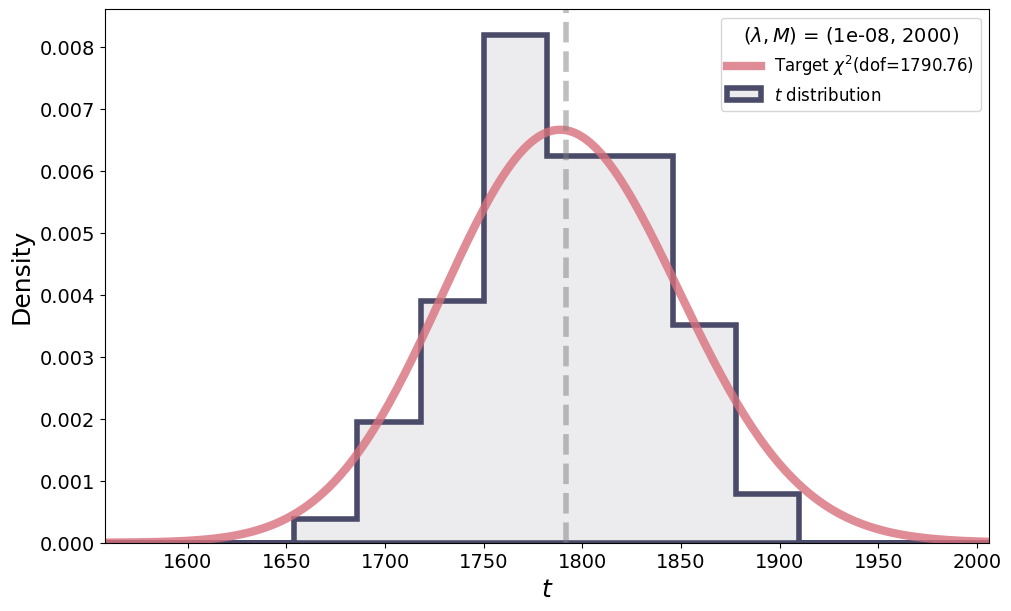

KS p value: 0.889


In [9]:
l=1e-8;     M=2000
with open('../output/bank_data/Shape_only/2024_3_8_18_40_ref_5000_bkg_1000_sig_0_SOn/ttest_time_1e-08_2000.csv') as f:
    t_ref_final = np.array([float(row.split()[0]) for row in f])

df_fit_SO, loc, scale = chi2.fit(t_ref_final, floc=0, fscale=1)
t_ref_bins  = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 32)
xgrid_ref   = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 2)

ref_chi2 = chi2(df=df_fit_SO)

plot_one_t(
    t_distribution  = t_ref_final,
    t_bins          = t_ref_bins,
    chi2            = ref_chi2,
    chi2_grid       = xgrid_ref,
    show_hist       = True,
    show_error      = False,
    compute_rate    = False,
    err_marker      = "o",
    err_markersize  = 10,
    err_capsize     = 5,
    err_elinewidth  = 4,
    err_capthick    = 4,
    err_color       = "black",
    figsize         = (10, 6),
    fontsize        = 18,
    cms             = False,
    cms_label       = "",
    cms_rlabel      = "",
    hist_ecolor     = ("#494B69", 1.0),
    hist_fcolor     = ("#494B69", 0.1),
    chi2_color      = ("#D8707C", 0.8),
    hist_lw         = 4,
    chi2_lw         = 6,
    hist_type       = "stepfilled",
    hist_label      = "$\it{t}$ distribution",
    chi2_label      = "Target $\chi^2$(dof=%.2f)"%(df_fit_SO),
    xlabel          = r"$t$",
    ylabel          = "Density",
    show_plot       = True,
    save_plot       = False,
    plot_name       = "t_distribution_"+str(l)+"_"+str(M),
    plot_path       = "",
    plot_format     = "png",
    return_fig      = False,
    plot_params     = True,
    hyperparams     = str(l)+", "+str(M),
)

_, ks_p_value = stats.kstest(t_ref_final, "chi2", args=(df_fit_SO,))
print("KS p value:", np.around(ks_p_value, 4))


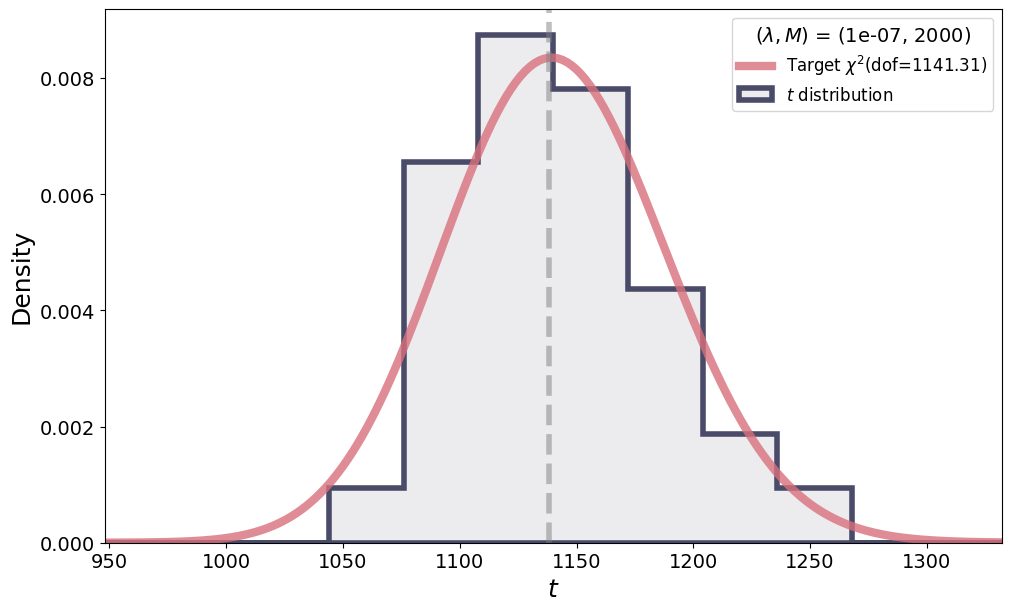

KS p value: 0.7132


In [31]:
l=1e-7;     M=2000
with open('../output/bank_data/Shape_only/2024_3_14_11_24_ref_5000_bkg_1000_sig_0_SOn/ttest_time_1e-07_2000.csv') as f:
    t_ref_final = np.array([float(row.split()[0]) for row in f])[:100]
    
df_fit_SO, loc, scale = chi2.fit(t_ref_final, floc=0, fscale=1)
t_ref_bins  = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 32)
xgrid_ref   = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 2)

ref_chi2 = chi2(df=df_fit_SO)

plot_one_t(
    t_distribution  = t_ref_final,
    t_bins          = t_ref_bins,
    chi2            = ref_chi2,
    chi2_grid       = xgrid_ref,
    show_hist       = True,
    show_error      = False,
    compute_rate    = False,
    err_marker      = "o",
    err_markersize  = 10,
    err_capsize     = 5,
    err_elinewidth  = 4,
    err_capthick    = 4,
    err_color       = "black",
    figsize         = (10, 6),
    fontsize        = 18,
    cms             = False,
    cms_label       = "",
    cms_rlabel      = "",
    hist_ecolor     = ("#494B69", 1.0),
    hist_fcolor     = ("#494B69", 0.1),
    chi2_color      = ("#D8707C", 0.8),
    hist_lw         = 4,
    chi2_lw         = 6,
    hist_type       = "stepfilled",
    hist_label      = "$\it{t}$ distribution",
    chi2_label      = "Target $\chi^2$(dof=%.2f)"%(df_fit_SO),
    xlabel          = r"$t$",
    ylabel          = "Density",
    show_plot       = True,
    save_plot       = False,
    plot_name       = "t_distribution_"+str(l)+"_"+str(M),
    plot_path       = "",
    plot_format     = "png",
    return_fig      = False,
    plot_params     = True,
    hyperparams     = str(l)+", "+str(M),
)

_, ks_p_value = stats.kstest(t_ref_final, "chi2", args=(df_fit_SO,))
print("KS p value:", np.around(ks_p_value, 4))


## SIGNAL $\neq$ 0

Expected signal event are: {10, 20, 30, 40, 50, 80, 100}\
The effective number of signal (which are replacing N_bkg) is not know a priori but oscillate as a poisson random having the rate = expected N_sig 

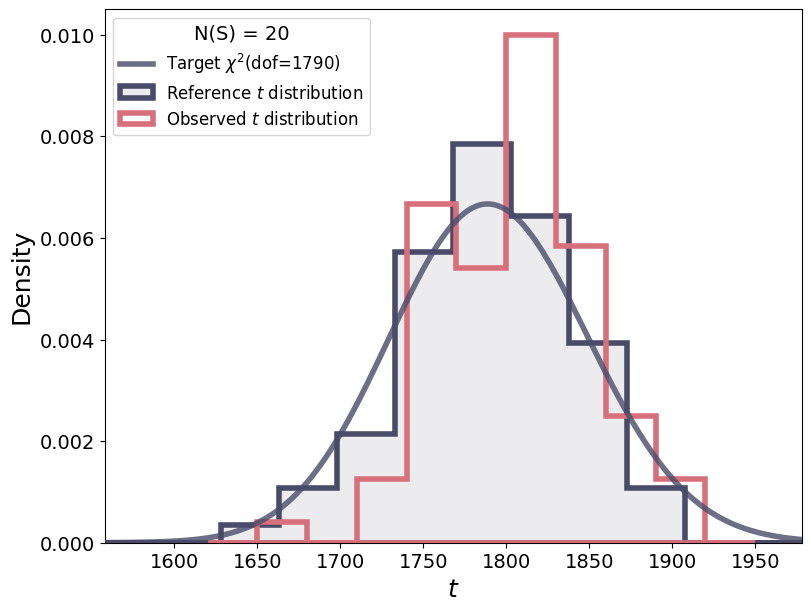

In [24]:
with open("../output/bank_data/Shape_only/2024_3_9_15_8_ref_5000_bkg_1000_sig_20_SOn/ttest_time_1e-08_2000.csv") as f:
    t_data_final = np.array([float(row.split()[0]) for row in f])

t_data_bins = np.arange(int(np.min(t_data_final))-50, int(np.max(t_data_final))+50, 30)
xgrid_data  = np.arange(int(np.min(t_data_final))-50, int(np.max(t_data_final))+50, 2)

plot_two_t(
    t_distribution_1  = np.array(t_ref_final),
    t_bins_1          = t_ref_bins,
    t_distribution_2  = np.array(t_data_final),
    t_bins_2          = t_data_bins,
    chi2              = ref_chi2,
    chi2_grid         = xgrid_ref,
    show_error_1      = False,
    show_error_2      = False,
    show_hist_1       = True,
    show_hist_2       = True,
    compute_rate_1    = False,
    compute_rate_2    = False,
    err_marker_1      = "o",
    err_marker_2      = "o",
    err_markersize_1  = 10,
    err_markersize_2  = 10,
    err_capsize_1     = 5,
    err_capsize_2     = 5,
    err_elinewidth_1  = 4,
    err_elinewidth_2  = 4,
    err_capthick_1    = 4,
    err_capthick_2    = 4,
    figsize           = (8, 6),
    fontsize          = 18,
    cms               = False,
    cms_label         = "",
    cms_rlabel        = "",
    hist_ecolor_1     = ("#494B69", 1),
    hist_ecolor_2     = ("#D8707C", 1),
    hist_fcolor_1     = ("#494B69", 0.1),
    hist_fcolor_2     = ("#D8707C", 0),
    err_ecolor_1      = ("#494B69", 1),
    err_ecolor_2      = ("#D8707C", 1),
    chi2_color        = ("#494B69", 0.8),
    hist_lw_1         = 4,
    hist_lw_2         = 4,
    chi2_lw           = 4,
    hist_type_1       = "stepfilled",
    hist_type_2       = "stepfilled",
    hist_label_1      = "Reference $\it{t}$ distribution",
    hist_label_2      = "Observed $\it{t}$ distribution",
    chi2_label        = "Target $\chi^2$(dof=%i)"%(df_fit_SO),
    xlabel            = "$\it{t}$",
    ylabel            = "Density",
    show_plot         = True,
    save_plot         = False,
    plot_name         = "t_distribution_signal",
    plot_path         = "/home/ubuntu/NPLM-Falkon/output/bank_data/results/results.csv",
    plot_format       = "png",
    return_fig        = False,
    plot_params       = True,
    hyperparams       = str(l)+", "+str(M),
    N_SIG             = 20 
)


In [25]:
l=1e-8; M=2000
OUTPUT_PATH = '../output/bank_data/Shape_only/'
df_so = pd.DataFrame(columns=['N_sig', 'p_value', 'Z_obs','Z_obs_m', 'Z_obs_p', 'timing'])
folders = [OUTPUT_PATH+directory for directory in os.listdir(OUTPUT_PATH) if 'sig' in directory]
for dir in folders:
    N_sig = extract_Nsig_SO(dir)
    if N_sig != 0:
        with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
            t_data = np.array([float(row.split()[0]) for row in f])
        with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
            t_timing = np.array([float(row.split()[1]) for row in f])

        '''ordinare e tirare fuori il numero di signal events e printare solo lo Z score'''
        t_obs = np.quantile(t_data,0.5)
        # t_obs = np.median(t_data)
        p_val = 1 - chi2.cdf(np.median(t_data), df_fit_SO)
        Z_obs     = norm.ppf(chi2.cdf(np.median(t_data), df_fit_SO))
        t_obs_err = 1.2533*np.std(t_data)*1./np.sqrt(len(t_data))
        Z_obs_p   = norm.ppf(chi2.cdf(np.quantile(t_data, 0.84),df_fit_SO))
        Z_obs_m   = norm.ppf(chi2.cdf(np.quantile(t_data, 0.16),df_fit_SO))
        
        # df_so = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs_m, Z_obs_p, np.mean(t_timing)]], columns=df_so.columns), df_so], ignore_index=True)
        df_so = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-abs(Z_obs_m), Z_obs_p - Z_obs, np.mean(t_timing)]], columns=df_so.columns), df_so], ignore_index=True)

df_so = df_so.sort_values('N_sig', ascending =True, ignore_index=True)
df_so['p_value']     = df_so['p_value'].round(5)

pd.options.display.float_format = '{:,.4f}'.format
df_so.head(10)


/tmp/ipykernel_89311/898703544.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_so = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-abs(Z_obs_m), Z_obs_p - Z_obs, np.mean(t_timing)]], columns=df_so.columns), df_so], ignore_index=True)


,N_sig,p_value,Z_obs,Z_obs_m,Z_obs_p,timing
0,10,0.4179,0.2073,-0.6381,0.6355,6.0276
1,20,0.4009,0.2510,-0.2405,0.7472,5.9555
2,30,0.1532,1.0226,0.7978,0.9763,5.9390
3,40,0.0692,1.4820,0.7096,0.6087,5.9122
4,50,0.0491,1.6534,0.9707,0.8819,5.8636
5,80,0.0022,2.8464,0.7498,0.9951,6.0260
6,100,0.0001,3.7242,0.8342,0.9090,6.0017


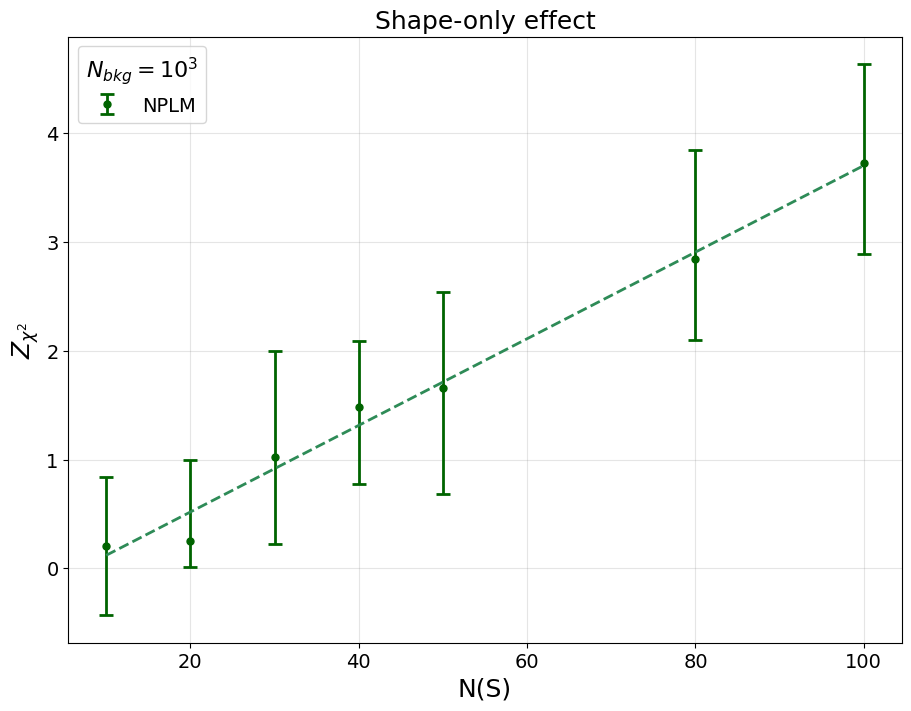

In [26]:
par ,_ = optimize.curve_fit(lambda x,m,q: m*x+q, df_so['N_sig'], df_so['Z_obs'])
m,q = par[0], par[1]

fig, ax = plt.subplots(figsize=(9,7), constrained_layout=True)
ax.set_title('Shape-only effect', fontsize=18)
ax.tick_params(axis = "x", labelsize = 14, which = "major")
ax.tick_params(axis = "y", labelsize = 14, which = "major")
ax.set_xlabel('N(S)', fontsize = 18)
ax.set_ylabel('$Z_{\chi^2}$', fontsize = 18)
ax.errorbar(df_so['N_sig'], df_so['Z_obs'], yerr=np.array((abs(df_so['Z_obs_m']), df_so['Z_obs_p']), ndmin=2),
            label='NPLM',
            marker='o', lw=2, ls='', color='darkgreen',elinewidth=2, capsize=5, markersize=5, capthick=2)
ax.plot(df_so['N_sig'], m*df_so['N_sig']+q, lw=2, linestyle='--', color='seagreen')
ax.grid(color='grey', alpha=0.2, which='major')
ax.legend(fontsize=14, title='$N_{bkg}=10^3$', title_fontsize=16)

### 1e-7, 2000

In [37]:
l=1e-7; M=2000
OUTPUT_PATH = '../output/bank_data/Shape_only/'
df_so = pd.DataFrame(columns=['N_sig', 'p_value', 'Z_obs','Z_obs_m', 'Z_obs_p', 'timing'])
folders = [OUTPUT_PATH+directory for directory in os.listdir(OUTPUT_PATH) if 'sig' in directory if "signal" not in directory]
for dir in folders:
    N_sig = extract_Nsig_SO(dir)
    if N_sig != 0:
        with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
            t_data = np.array([float(row.split()[0]) for row in f])
        with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
            t_timing = np.array([float(row.split()[1]) for row in f])

        '''ordinare e tirare fuori il numero di signal events e printare solo lo Z score'''
        t_obs = np.quantile(t_data,0.5)
        # t_obs = np.median(t_data)
        p_val = 1 - chi2.cdf(np.median(t_data), df_fit_SO)
        Z_obs     = norm.ppf(chi2.cdf(np.median(t_data), df_fit_SO))
        t_obs_err = 1.2533*np.std(t_data)*1./np.sqrt(len(t_data))
        Z_obs_p   = norm.ppf(chi2.cdf(np.quantile(t_data, 0.84),df_fit_SO))
        Z_obs_m   = norm.ppf(chi2.cdf(np.quantile(t_data, 0.16),df_fit_SO))
        
        # df_so = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs_m, Z_obs_p, np.mean(t_timing)]], columns=df_so.columns), df_so], ignore_index=True)
        df_so = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-abs(Z_obs_m), Z_obs_p - Z_obs, np.mean(t_timing)]], columns=df_so.columns), df_so], ignore_index=True)

df_so = df_so.sort_values('N_sig', ascending =True, ignore_index=True)
df_so['p_value']     = df_so['p_value'].round(5)

pd.options.display.float_format = '{:,.4f}'.format
df_so.head(10)


/tmp/ipykernel_308325/3554602491.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_so = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-abs(Z_obs_m), Z_obs_p - Z_obs, np.mean(t_timing)]], columns=df_so.columns), df_so], ignore_index=True)


,N_sig,p_value,Z_obs,Z_obs_m,Z_obs_p,timing
0,10,0.4707,0.0736,-0.7575,0.8081,1.4695
1,20,0.1890,0.8816,0.8169,0.8060,1.4516
2,30,0.1421,1.0707,0.6967,0.9505,1.4812
3,40,0.0218,2.0184,0.6732,0.8234,1.4540
4,50,0.0063,2.4951,0.7961,0.7754,1.5756
5,80,0.0000,4.0752,0.9777,0.8049,1.6038
6,100,0.0000,5.2813,0.7054,1.1203,1.5331


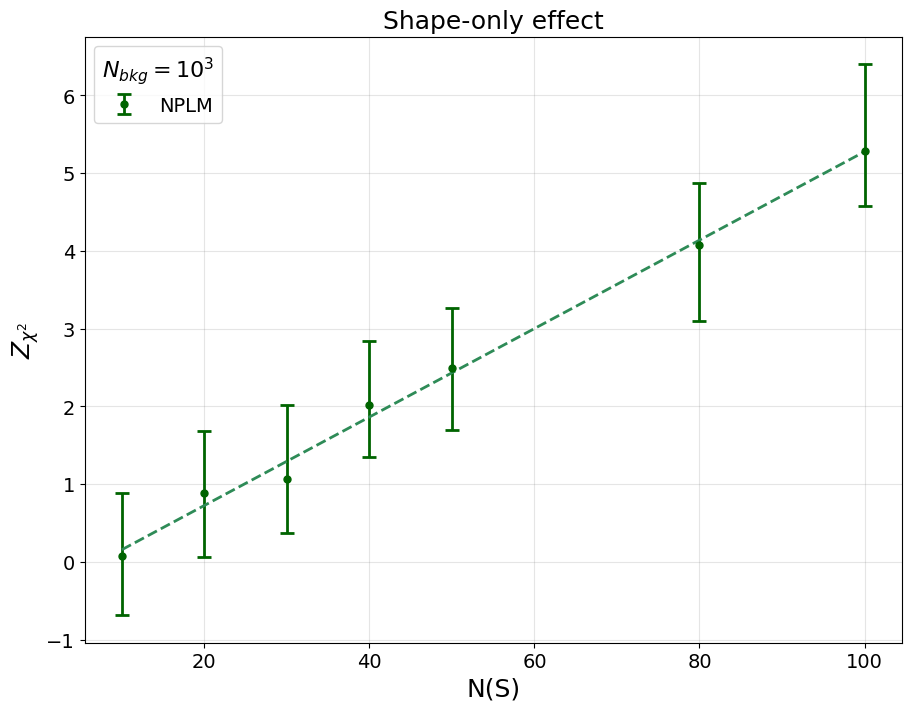

In [38]:
par ,_ = optimize.curve_fit(lambda x,m,q: m*x+q, df_so['N_sig'], df_so['Z_obs'])
m,q = par[0], par[1]

fig, ax = plt.subplots(figsize=(9,7), constrained_layout=True)
ax.set_title('Shape-only effect', fontsize=18)
ax.tick_params(axis = "x", labelsize = 14, which = "major")
ax.tick_params(axis = "y", labelsize = 14, which = "major")
ax.set_xlabel('N(S)', fontsize = 18)
ax.set_ylabel('$Z_{\chi^2}$', fontsize = 18)
ax.errorbar(df_so['N_sig'], df_so['Z_obs'], yerr=np.array((abs(df_so['Z_obs_m']), df_so['Z_obs_p']), ndmin=2),
            label='NPLM',
            marker='o', lw=2, ls='', color='darkgreen',elinewidth=2, capsize=5, markersize=5, capthick=2)
ax.plot(df_so['N_sig'], m*df_so['N_sig']+q, lw=2, linestyle='--', color='seagreen')
ax.grid(color='grey', alpha=0.2, which='major')
ax.legend(fontsize=14, title='$N_{bkg}=10^3$', title_fontsize=16)

### 1e-7, 2000 re-do


In [10]:
l=1e-7; M=2000
#########  best dist  ###########
with open('../output/bank_data/Shape_only_nodiff/2024_3_19_17_57_ref_5000_bkg_1000_sig_0_SOn/ttest_time_1e-07_2000.csv') as f:
    t_ref_final = np.array([float(row.split()[0]) for row in f])

df_fit_SO, loc, scale = chi2.fit(t_ref_final, floc=0, fscale=1)
t_ref_bins  = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 28)
xgrid_ref   = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 2)

#########  signal  #########
OUTPUT_PATH = '../output/bank_data/Shape_only/'
df_so = pd.DataFrame(columns=['N_sig', 'p_value', 'Z_obs','Z_obs_m', 'Z_obs_p', 'timing'])
folders = [OUTPUT_PATH+directory for directory in os.listdir(OUTPUT_PATH) if 'sig' in directory if "signal" not in directory]
for dir in folders:
    N_sig = extract_Nsig_SO(dir)
    if N_sig != 0:
        with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
            t_data = np.array([float(row.split()[0]) for row in f])
        with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
            t_timing = np.array([float(row.split()[1]) for row in f])

        '''ordinare e tirare fuori il numero di signal events e printare solo lo Z score'''
        t_obs = np.quantile(t_data,0.5)
        # t_obs = np.median(t_data)
        p_val = 1 - chi2.cdf(np.median(t_data), df_fit_SO)
        Z_obs     = norm.ppf(chi2.cdf(np.median(t_data), df_fit_SO))
        t_obs_err = 1.2533*np.std(t_data)*1./np.sqrt(len(t_data))
        Z_obs_p   = norm.ppf(chi2.cdf(np.quantile(t_data, 0.84),df_fit_SO))
        Z_obs_m   = norm.ppf(chi2.cdf(np.quantile(t_data, 0.16),df_fit_SO))
        
        # df_so = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs_m, Z_obs_p, np.mean(t_timing)]], columns=df_so.columns), df_so], ignore_index=True)
        df_so = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-abs(Z_obs_m), Z_obs_p - Z_obs, np.mean(t_timing)]], columns=df_so.columns), df_so], ignore_index=True)

df_so = df_so.sort_values('N_sig', ascending =True, ignore_index=True)
df_so['p_value']     = df_so['p_value'].round(5)

pd.options.display.float_format = '{:,.4f}'.format
df_so.head(10)


/tmp/ipykernel_880762/1246602879.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_so = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-abs(Z_obs_m), Z_obs_p - Z_obs, np.mean(t_timing)]], columns=df_so.columns), df_so], ignore_index=True)


,N_sig,p_value,Z_obs,Z_obs_m,Z_obs_p,timing
0,10,0.3557,0.3701,-0.1284,0.7127,1.1347
1,20,0.2392,0.7090,0.5527,0.8845,1.1438
2,30,0.0982,1.2920,0.5832,0.9014,1.2179
3,40,0.0226,2.0026,0.8532,0.7690,1.1134
4,50,0.0059,2.5176,0.8986,0.8745,1.1568
5,80,0.0000,4.4522,0.8049,0.8219,1.2030
6,100,0.0000,5.6651,0.9523,0.6452,1.1830


<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_880762/1969194570.py:9: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('$Z_{\chi^2}$', fontsize = 18)


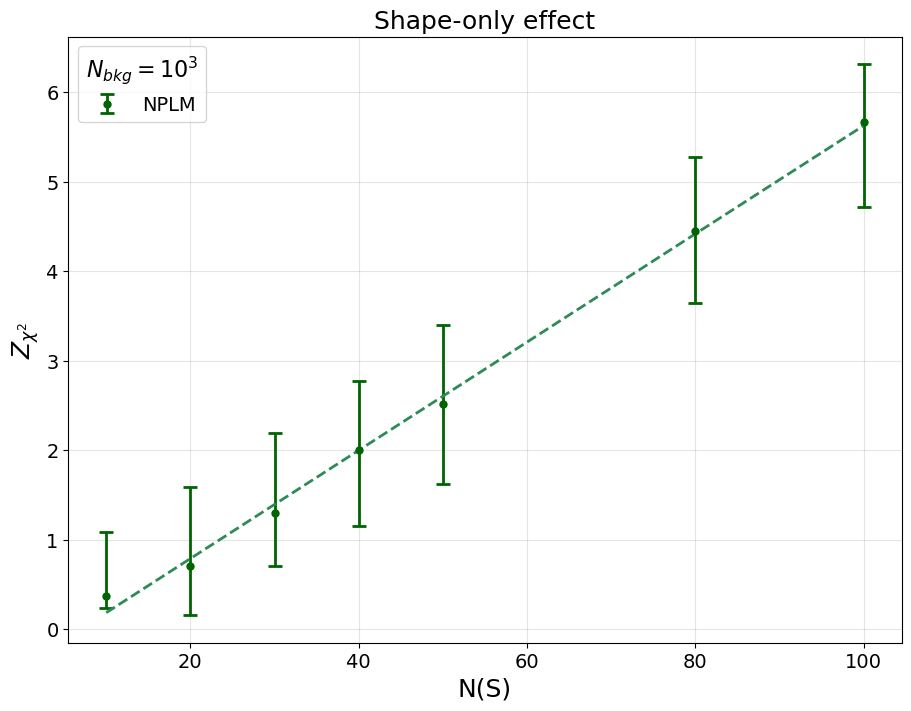

In [11]:
par ,_ = optimize.curve_fit(lambda x,m,q: m*x+q, df_so['N_sig'], df_so['Z_obs'])
m,q = par[0], par[1]

fig, ax = plt.subplots(figsize=(9,7), constrained_layout=True)
ax.set_title('Shape-only effect', fontsize=18)
ax.tick_params(axis = "x", labelsize = 14, which = "major")
ax.tick_params(axis = "y", labelsize = 14, which = "major")
ax.set_xlabel('N(S)', fontsize = 18)
ax.set_ylabel('$Z_{\chi^2}$', fontsize = 18)
ax.errorbar(df_so['N_sig'], df_so['Z_obs'], yerr=np.array((abs(df_so['Z_obs_m']), df_so['Z_obs_p']), ndmin=2),
            label='NPLM',
            marker='o', lw=2, ls='', color='darkgreen',elinewidth=2, capsize=5, markersize=5, capthick=2)
ax.plot(df_so['N_sig'], m*df_so['N_sig']+q, lw=2, linestyle='--', color='seagreen')
ax.grid(color='grey', alpha=0.2, which='major')
ax.legend(fontsize=14, title='$N_{bkg}=10^3$', title_fontsize=16)

# SHAPE-ONLY effect without extented likelihood ratio

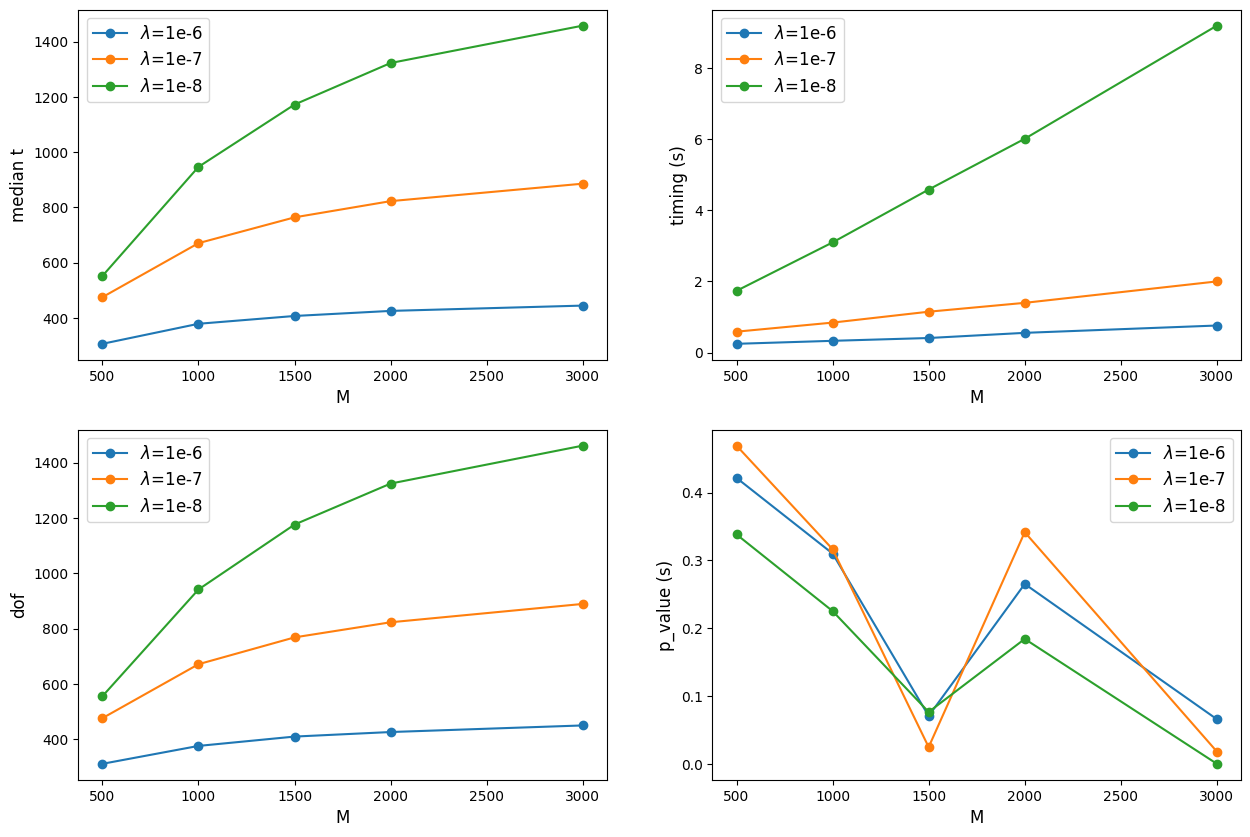

In [27]:
df_m2 = pd.read_csv("../output/bank_data/Shape_only/NO_diff/results/2024_3_12_17_22_ref_5000_bkg_1000_sig_0_SOn_0_SOn.csv", sep="\t")

fig, ax = plt.subplots(figsize=(15,10), nrows=2, ncols=2)
df_m2 = df_m2.sort_values('M', ascending =False)  

ax[0][0].plot(df_m2[df_m2['lambda']==1e-6]['M'], df_m2[df_m2['lambda']==1e-6]['median'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[0][0].plot(df_m2[df_m2['lambda']==1e-7]['M'], df_m2[df_m2['lambda']==1e-7]['median'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[0][0].plot(df_m2[df_m2['lambda']==1e-8]['M'], df_m2[df_m2['lambda']==1e-8]['median'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[0][0].set_xlabel('M', fontsize=12)
ax[0][0].set_ylabel('median t', fontsize=12)
ax[0][0].legend(fontsize =12)

ax[0][1].plot(df_m2[df_m2['lambda']==1e-6]['M'], df_m2[df_m2['lambda']==1e-6]['timing'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[0][1].plot(df_m2[df_m2['lambda']==1e-7]['M'], df_m2[df_m2['lambda']==1e-7]['timing'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[0][1].plot(df_m2[df_m2['lambda']==1e-8]['M'], df_m2[df_m2['lambda']==1e-8]['timing'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[0][1].set_xlabel('M', fontsize=12)
ax[0][1].set_ylabel('timing (s)', fontsize=12)
ax[0][1].legend(fontsize =12)

ax[1][0].plot(df_m2[df_m2['lambda']==1e-6]['M'], df_m2[df_m2['lambda']==1e-6]['dof'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[1][0].plot(df_m2[df_m2['lambda']==1e-7]['M'], df_m2[df_m2['lambda']==1e-7]['dof'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[1][0].plot(df_m2[df_m2['lambda']==1e-8]['M'], df_m2[df_m2['lambda']==1e-8]['dof'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[1][0].set_xlabel('M', fontsize=12)
ax[1][0].set_ylabel('dof', fontsize=12)
ax[1][0].legend(fontsize =12)

ax[1][1].plot(df_m2[df_m2['lambda']==1e-6]['M'], df_m2[df_m2['lambda']==1e-6]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-6")
ax[1][1].plot(df_m2[df_m2['lambda']==1e-7]['M'], df_m2[df_m2['lambda']==1e-7]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-7")
ax[1][1].plot(df_m2[df_m2['lambda']==1e-8]['M'], df_m2[df_m2['lambda']==1e-8]['p_value'], marker='o', markersize=6, label="$\lambda$=1e-8")
ax[1][1].set_xlabel('M', fontsize=12)
ax[1][1].set_ylabel('p_value (s)', fontsize=12)
ax[1][1].legend(fontsize =12)


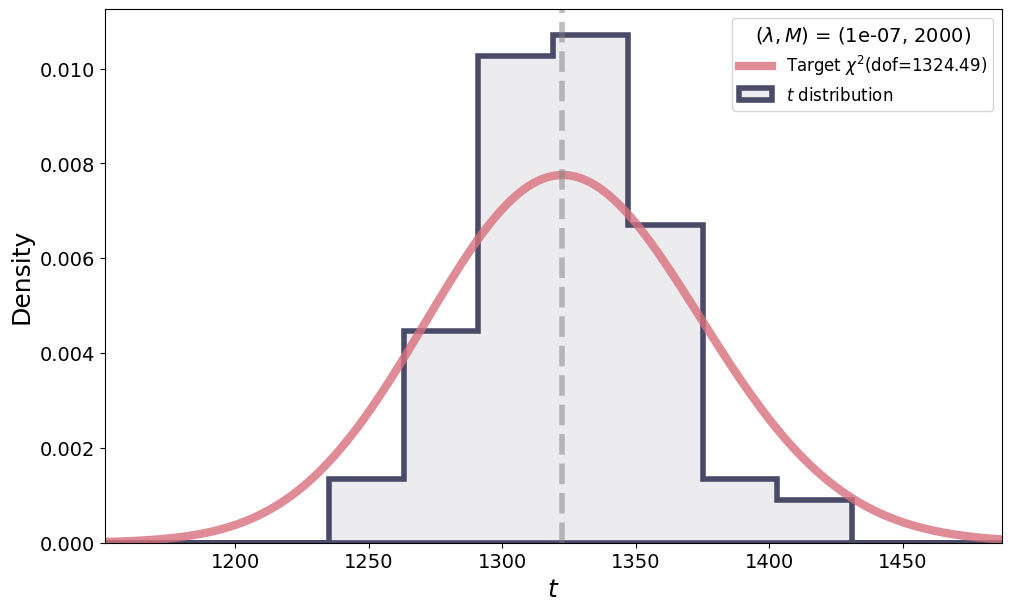

KS p value: 0.1845


In [43]:
l=1e-8;     M=2000
with open('../output/bank_data/Shape_only/NO_diff/2024_3_12_17_22_ref_5000_bkg_1000_sig_0_SOn/ttest_time_1e-08_2000.csv') as f:
    t_ref_final = np.array([float(row.split()[0]) for row in f])

df_fit_SO_nodiff, loc, scale = chi2.fit(t_ref_final, floc=0, fscale=1)
t_ref_bins  = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 28)
xgrid_ref   = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 2)

ref_chi2 = chi2(df=df_fit_SO_nodiff)

plot_one_t(
    t_distribution  = t_ref_final,
    t_bins          = t_ref_bins,
    chi2            = ref_chi2,
    chi2_grid       = xgrid_ref,
    show_hist       = True,
    show_error      = False,
    compute_rate    = False,
    err_marker      = "o",
    err_markersize  = 10,
    err_capsize     = 5,
    err_elinewidth  = 4,
    err_capthick    = 4,
    err_color       = "black",
    figsize         = (10, 6),
    fontsize        = 18,
    cms             = False,
    cms_label       = "",
    cms_rlabel      = "",
    hist_ecolor     = ("#494B69", 1.0),
    hist_fcolor     = ("#494B69", 0.1),
    chi2_color      = ("#D8707C", 0.8),
    hist_lw         = 4,
    chi2_lw         = 6,
    hist_type       = "stepfilled",
    hist_label      = "$\it{t}$ distribution",
    chi2_label      = "Target $\chi^2$(dof=%.2f)"%(df_fit_SO_nodiff),
    xlabel          = r"$t$",
    ylabel          = "Density",
    show_plot       = True,
    save_plot       = False,
    plot_name       = "t_distribution_"+str(l)+"_"+str(M),
    plot_path       = "",
    plot_format     = "png",
    return_fig      = False,
    plot_params     = True,
    hyperparams     = str(l)+", "+str(M),
)

_, ks_p_value = stats.kstest(t_ref_final, "chi2", args=(df_fit_SO_nodiff,))
print("KS p value:", np.around(ks_p_value, 4))


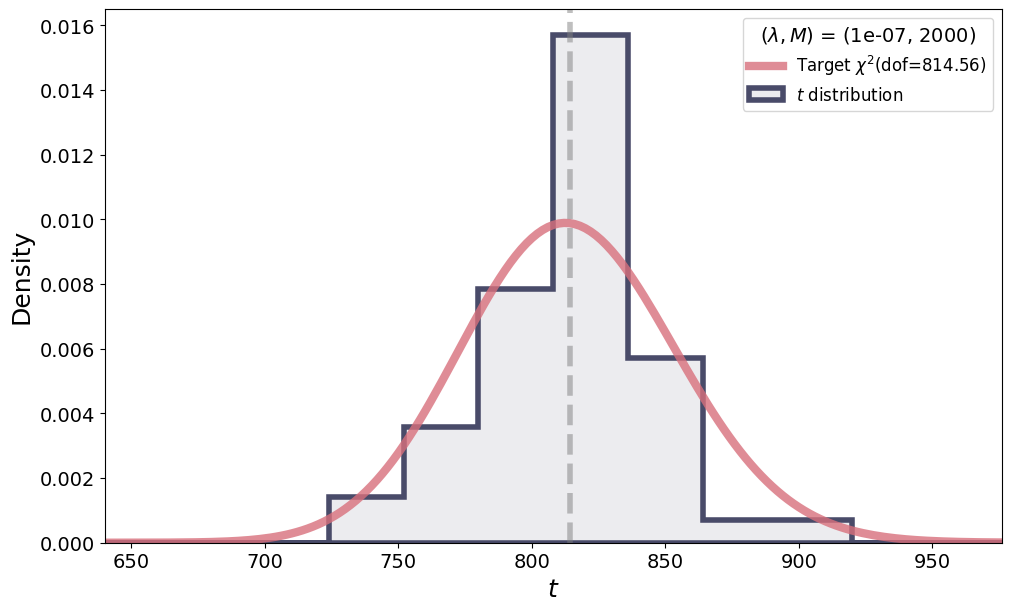

KS p value: 0.431


In [52]:
l=1e-7;     M=2000
with open('../output/bank_data/Shape_only/NO_diff/2024_3_14_11_46_ref_5000_bkg_1000_sig_0_SOn/ttest_time_1e-07_2000.csv') as f:
    t_ref_final = np.array([float(row.split()[0]) for row in f])[:50]

df_fit_SO_nodiff, loc, scale = chi2.fit(t_ref_final, floc=0, fscale=1)
t_ref_bins  = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 28)
xgrid_ref   = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 2)

ref_chi2 = chi2(df=df_fit_SO_nodiff)

plot_one_t(
    t_distribution  = t_ref_final,
    t_bins          = t_ref_bins,
    chi2            = ref_chi2,
    chi2_grid       = xgrid_ref,
    show_hist       = True,
    show_error      = False,
    compute_rate    = False,
    err_marker      = "o",
    err_markersize  = 10,
    err_capsize     = 5,
    err_elinewidth  = 4,
    err_capthick    = 4,
    err_color       = "black",
    figsize         = (10, 6),
    fontsize        = 18,
    cms             = False,
    cms_label       = "",
    cms_rlabel      = "",
    hist_ecolor     = ("#494B69", 1.0),
    hist_fcolor     = ("#494B69", 0.1),
    chi2_color      = ("#D8707C", 0.8),
    hist_lw         = 4,
    chi2_lw         = 6,
    hist_type       = "stepfilled",
    hist_label      = "$\it{t}$ distribution",
    chi2_label      = "Target $\chi^2$(dof=%.2f)"%(df_fit_SO_nodiff),
    xlabel          = r"$t$",
    ylabel          = "Density",
    show_plot       = True,
    save_plot       = False,
    plot_name       = "t_distribution_"+str(l)+"_"+str(M),
    plot_path       = "",
    plot_format     = "png",
    return_fig      = False,
    plot_params     = True,
    hyperparams     = str(l)+", "+str(M),
)

_, ks_p_value = stats.kstest(t_ref_final, "chi2", args=(df_fit_SO_nodiff,))
print("KS p value:", np.around(ks_p_value, 4))


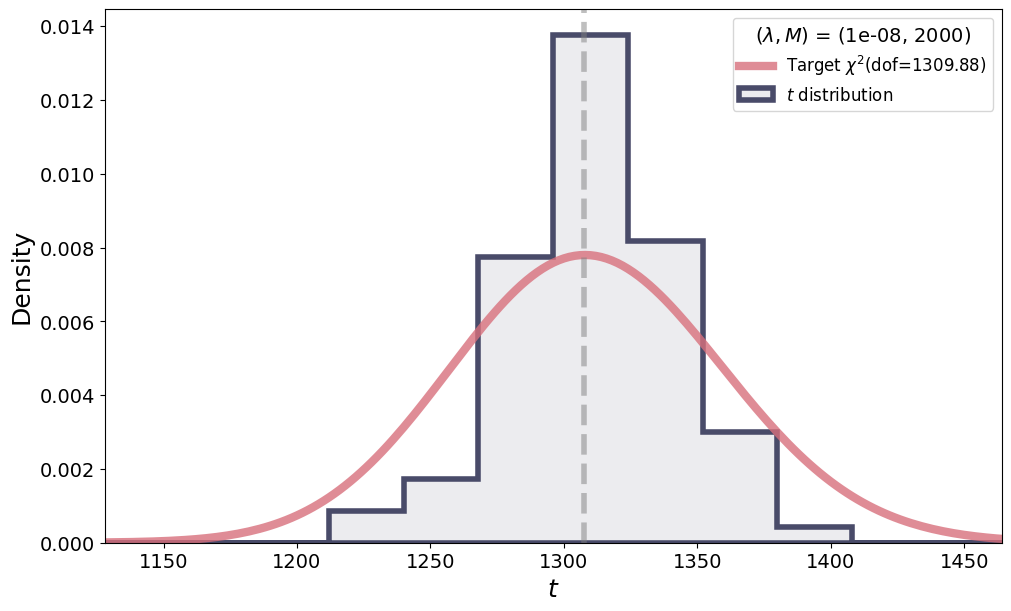

KS p value: 0.0421


In [26]:
l=1e-8;     M=2000
with open('../output/bank_data/Shape_only/NO_diff/2024_3_14_11_46_ref_5000_bkg_1000_sig_0_SOn/ttest_time_1e-08_2000.csv') as f:
    t_ref_final = np.array([float(row.split()[0]) for row in f])

df_fit_SO_nodiff, loc, scale = chi2.fit(t_ref_final, floc=0, fscale=1)
t_ref_bins  = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 28)
xgrid_ref   = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 2)

ref_chi2 = chi2(df=df_fit_SO_nodiff)

plot_one_t(
    t_distribution  = t_ref_final,
    t_bins          = t_ref_bins,
    chi2            = ref_chi2,
    chi2_grid       = xgrid_ref,
    show_hist       = True,
    show_error      = False,
    compute_rate    = False,
    err_marker      = "o",
    err_markersize  = 10,
    err_capsize     = 5,
    err_elinewidth  = 4,
    err_capthick    = 4,
    err_color       = "black",
    figsize         = (10, 6),
    fontsize        = 18,
    cms             = False,
    cms_label       = "",
    cms_rlabel      = "",
    hist_ecolor     = ("#494B69", 1.0),
    hist_fcolor     = ("#494B69", 0.1),
    chi2_color      = ("#D8707C", 0.8),
    hist_lw         = 4,
    chi2_lw         = 6,
    hist_type       = "stepfilled",
    hist_label      = "$\it{t}$ distribution",
    chi2_label      = "Target $\chi^2$(dof=%.2f)"%(df_fit_SO_nodiff),
    xlabel          = r"$t$",
    ylabel          = "Density",
    show_plot       = True,
    save_plot       = False,
    plot_name       = "t_distribution_"+str(l)+"_"+str(M),
    plot_path       = "",
    plot_format     = "png",
    return_fig      = False,
    plot_params     = True,
    hyperparams     = str(l)+", "+str(M),
)

_, ks_p_value = stats.kstest(t_ref_final, "chi2", args=(df_fit_SO_nodiff,))
print("KS p value:", np.around(ks_p_value, 4))


## SIGNAL $\neq$ 0

Expected signal event are: {10, 20, 30, 40, 50, 80, 100}\
The effective number of signal (which are replacing N_bkg) is not know a priori but oscillate as a poisson random having the rate = expected N_sig 

In [32]:
l=1e-7; M=2000
with open('../output/bank_data/Shape_only_nodiff/2024_3_20_12_37_ref_5000_bkg_1000_sig_0_SOn/ttest_time_1e-07_2000.csv') as f:
    t_ref = np.array([float(row.split()[0]) for row in f])[:50]

df_fit_SO_nodiff, _, _ = chi2.fit(t_ref, floc=0, fscale=1)
t_ref_bins  = np.arange(int(np.min(t_ref))-100, int(np.max(t_ref))+100, 28)
xgrid_ref   = np.arange(int(np.min(t_ref))-100, int(np.max(t_ref))+100, 2)

# OUTPUT_PATH = '../output/bank_data/Shape_only/NO_diff/'
OUTPUT_PATH = '../output/bank_data/Shape_only_nodiff/'

df_so_nodiff = pd.DataFrame(columns=['N_sig', 'p_value', 'Z_obs','Z_obs_m', 'Z_obs_p', 'timing'])
folders = [OUTPUT_PATH+directory for directory in os.listdir(OUTPUT_PATH) if 'sig' in directory]
for dir in folders:
    N_sig = extract_Nsig_SO(dir)
    if N_sig != 0:
        with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
            t_data = np.array([float(row.split()[0]) for row in f])
        with open(dir + '/ttest_time_'+str(l)+'_'+str(M)+'.csv') as f:
            t_timing = np.array([float(row.split()[1]) for row in f])

        '''ordinare e tirare fuori il numero di signal events e printare solo lo Z score'''
        t_obs = np.quantile(t_data,0.5)
        # t_obs = np.median(t_data)
        p_val = 1 - chi2.cdf(np.median(t_data), df_fit_SO_nodiff)
        Z_obs     = norm.ppf(chi2.cdf(np.median(t_data), df_fit_SO_nodiff))
        t_obs_err = 1.2533*np.std(t_data)*1./np.sqrt(len(t_data))
        Z_obs_p   = norm.ppf(chi2.cdf(np.quantile(t_data, 0.84),df_fit_SO_nodiff))
        Z_obs_m   = norm.ppf(chi2.cdf(np.quantile(t_data, 0.16),df_fit_SO_nodiff))
        
        # df_so_nodiff = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs_m, Z_obs_p, np.mean(t_timing)]], columns=df_so_nodiff.columns), df_so_nodiff], ignore_index=True)
        df_so_nodiff = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-abs(Z_obs_m), Z_obs_p - Z_obs, np.mean(t_timing)]], columns=df_so_nodiff.columns), df_so_nodiff], ignore_index=True)

df_so_nodiff = df_so_nodiff.sort_values('N_sig', ascending =True, ignore_index=True)
df_so_nodiff['p_value']     = df_so_nodiff['p_value'].round(5)

pd.options.display.float_format = '{:,.4f}'.format
# df_so_nodiff = df_so_nodiff[1:]
df_so_nodiff.head(10)


/tmp/ipykernel_880762/1877435673.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_so_nodiff = pd.concat([pd.DataFrame([[N_sig, p_val, Z_obs, Z_obs-abs(Z_obs_m), Z_obs_p - Z_obs, np.mean(t_timing)]], columns=df_so_nodiff.columns), df_so_nodiff], ignore_index=True)


,N_sig,p_value,Z_obs,Z_obs_m,Z_obs_p,timing
0,10,0.4354,0.1626,-0.3870,0.6799,1.1700
1,20,0.3778,0.3113,-0.0285,1.0135,1.1497
2,30,0.1870,0.8890,0.7278,0.7430,1.1745
3,40,0.1396,1.0822,0.7156,0.6783,1.1552
4,50,0.0645,1.5177,0.7320,0.7589,1.1370
5,80,0.0032,2.7320,0.8412,0.6789,1.1997
6,100,0.0004,3.3669,0.6783,0.6222,1.2033


<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_880762/3177056967.py:9: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('$Z_{\chi^2}$', fontsize = 18)


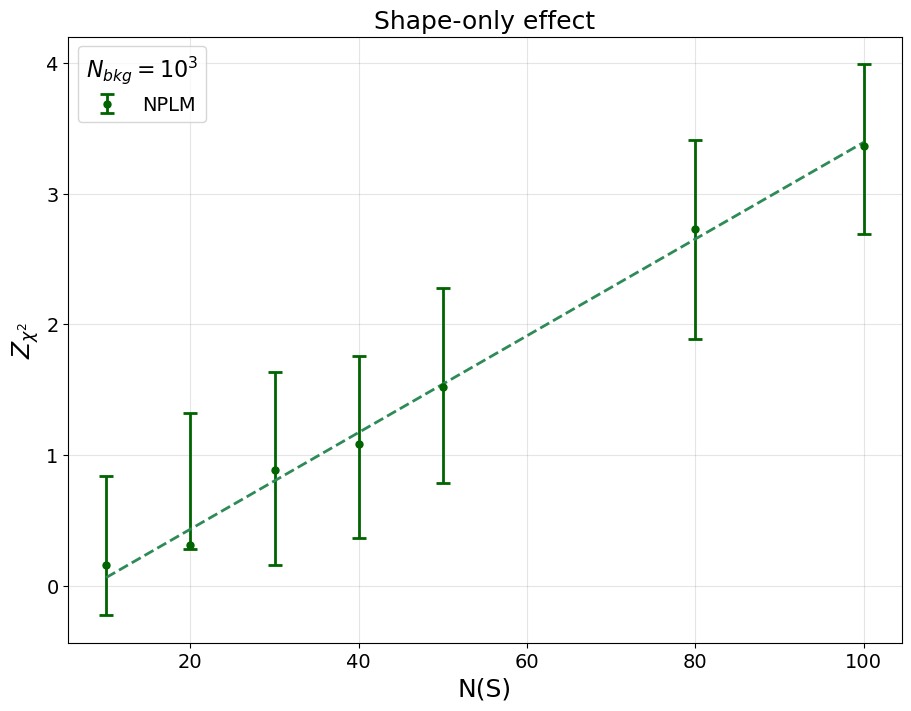

In [33]:
par ,_ = optimize.curve_fit(lambda x,m,q: m*x+q, df_so_nodiff['N_sig'], df_so_nodiff['Z_obs'])
m,q = par[0], par[1]

fig, ax = plt.subplots(figsize=(9,7), constrained_layout=True)
ax.set_title('Shape-only effect', fontsize=18)
ax.tick_params(axis = "x", labelsize = 14, which = "major")
ax.tick_params(axis = "y", labelsize = 14, which = "major")
ax.set_xlabel('N(S)', fontsize = 18)
ax.set_ylabel('$Z_{\chi^2}$', fontsize = 18)
ax.errorbar(df_so_nodiff['N_sig'], df_so_nodiff['Z_obs'], yerr=np.array((abs(df_so_nodiff['Z_obs_m']), df_so_nodiff['Z_obs_p']), ndmin=2),
            label='NPLM',
            marker='o', lw=2, ls='', color='darkgreen',elinewidth=2, capsize=5, markersize=5, capthick=2)
ax.plot(df_so_nodiff['N_sig'], m*df_so_nodiff['N_sig']+q, lw=2, linestyle='--', color='seagreen')
ax.grid(color='grey', alpha=0.2, which='major')
ax.legend(fontsize=14, title='$N_{bkg}=10^3$', title_fontsize=16)

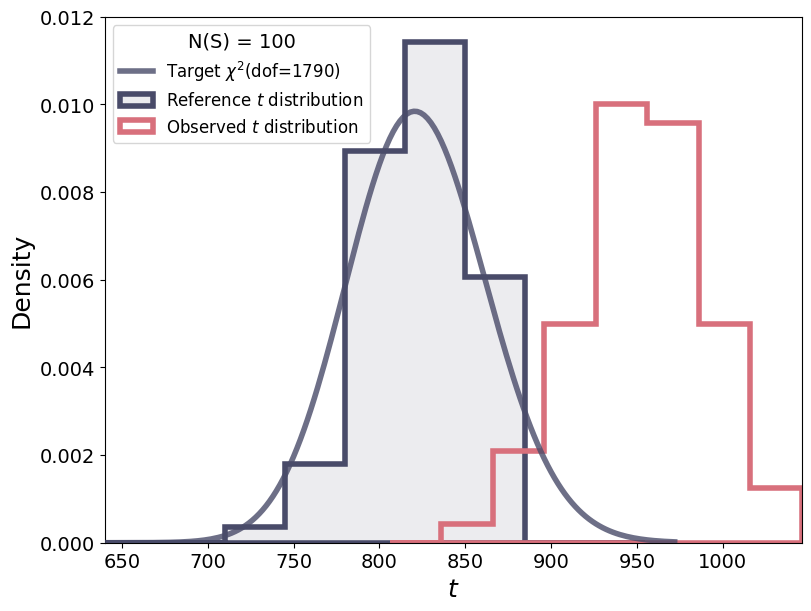

In [42]:
with open("../output/bank_data/Shape_only/NO_diff/2024_3_13_14_11_ref_5000_bkg_1000_sig_100_SOn/ttest_time_1e-07_2000.csv") as f:
    t_data_final = np.array([float(row.split()[0]) for row in f])


t_data_bins = np.arange(int(np.min(t_data_final))-50, int(np.max(t_data_final))+50, 30)
xgrid_data  = np.arange(int(np.min(t_data_final))-50, int(np.max(t_data_final))+50, 2)

plot_two_t(
    t_distribution_1  = np.array(t_ref_final),
    t_bins_1          = t_ref_bins,
    t_distribution_2  = np.array(t_data_final),
    t_bins_2          = t_data_bins,
    chi2              = ref_chi2,
    chi2_grid         = xgrid_ref,
    show_error_1      = False,
    show_error_2      = False,
    show_hist_1       = True,
    show_hist_2       = True,
    compute_rate_1    = False,
    compute_rate_2    = False,
    err_marker_1      = "o",
    err_marker_2      = "o",
    err_markersize_1  = 10,
    err_markersize_2  = 10,
    err_capsize_1     = 5,
    err_capsize_2     = 5,
    err_elinewidth_1  = 4,
    err_elinewidth_2  = 4,
    err_capthick_1    = 4,
    err_capthick_2    = 4,
    figsize           = (8, 6),
    fontsize          = 18,
    cms               = False,
    cms_label         = "",
    cms_rlabel        = "",
    hist_ecolor_1     = ("#494B69", 1),
    hist_ecolor_2     = ("#D8707C", 1),
    hist_fcolor_1     = ("#494B69", 0.1),
    hist_fcolor_2     = ("#D8707C", 0),
    err_ecolor_1      = ("#494B69", 1),
    err_ecolor_2      = ("#D8707C", 1),
    chi2_color        = ("#494B69", 0.8),
    hist_lw_1         = 4,
    hist_lw_2         = 4,
    chi2_lw           = 4,
    hist_type_1       = "stepfilled",
    hist_type_2       = "stepfilled",
    hist_label_1      = "Reference $\it{t}$ distribution",
    hist_label_2      = "Observed $\it{t}$ distribution",
    chi2_label        = "Target $\chi^2$(dof=%i)"%(df_fit_SO),
    xlabel            = "$\it{t}$",
    ylabel            = "Density",
    show_plot         = True,
    save_plot         = False,
    plot_name         = "t_distribution_signal",
    plot_path         = "/home/ubuntu/NPLM-Falkon/output/bank_data/results/results.csv",
    plot_format       = "png",
    return_fig        = False,
    plot_params       = True,
    hyperparams       = str(l)+", "+str(M),
    N_SIG             = 100
)


## Diff vs t distribution

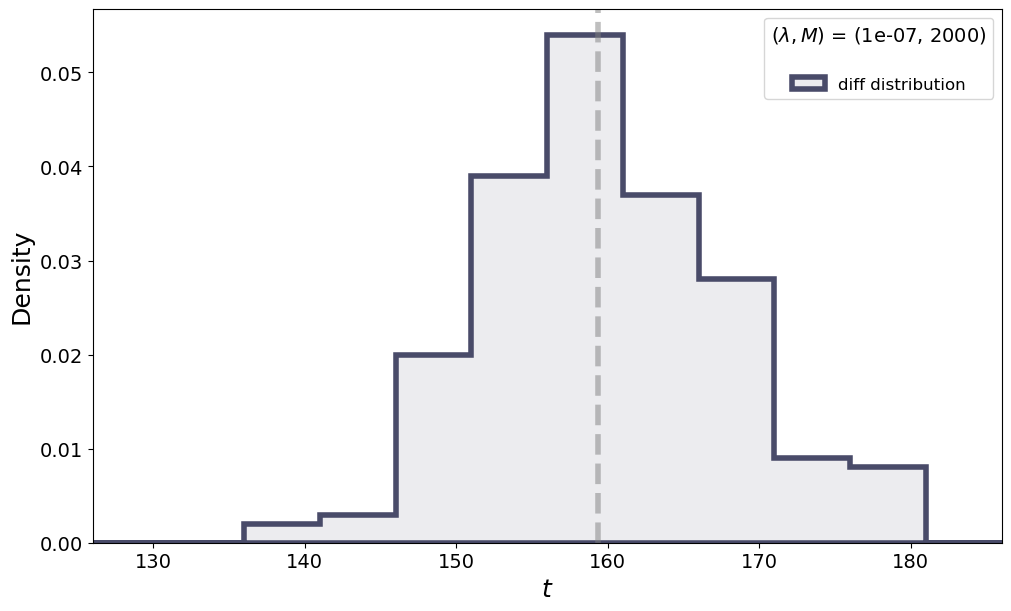

KS p value: 0.0
200


In [37]:
l=1e-7;     M=2000
# with open('../output/bank_data/Shape_and_Renorm/2024_3_19_17_42_ref_5000_bkg_1000_sig_0_SOn/ttest_time_1e-07_2000.csv') as f:
with open('../output/bank_data/Shape_only_nodiff/2024_3_19_17_57_ref_5000_bkg_1000_sig_0_SOn/ttest_time_1e-07_2000.csv') as f:
    diff_dist = np.array([float(row.split()[1]) for row in f])

df_fit_SO_nodiff, loc, scale = chi2.fit(diff_dist, floc=0, fscale=1)
t_ref_bins  = np.arange(int(np.min(diff_dist))-10, int(np.max(diff_dist))+10, 5)
xgrid_ref   = np.arange(int(np.min(diff_dist))-10, int(np.max(diff_dist))+10, 2)

ref_chi2 = chi2(df=df_fit_SO_nodiff)

plot_one_t(
    t_distribution  = diff_dist,
    t_bins          = t_ref_bins,
    chi2            = ref_chi2,
    chi2_grid       = xgrid_ref,
    show_hist       = True,
    show_error      = False,
    compute_rate    = False,
    err_marker      = "o",
    err_markersize  = 10,
    err_capsize     = 5,
    err_elinewidth  = 4,
    err_capthick    = 4,
    err_color       = "black",
    figsize         = (10, 6),
    fontsize        = 18,
    cms             = False,
    cms_label       = "",
    cms_rlabel      = "",
    hist_ecolor     = ("#494B69", 1.0),
    hist_fcolor     = ("#494B69", 0.1),
    chi2_color      = ("#D8707C", 0.8),
    hist_lw         = 4,
    chi2_lw         = 0,
    hist_type       = "stepfilled",
    hist_label      = "diff distribution",
    chi2_label      = "",
    xlabel          = r"$t$",
    ylabel          = "Density",
    show_plot       = True,
    save_plot       = False,
    plot_name       = "t_distribution_"+str(l)+"_"+str(M),
    plot_path       = "",
    plot_format     = "png",
    return_fig      = False,
    plot_params     = True,
    hyperparams     = str(l)+", "+str(M),
)

_, ks_p_value = stats.kstest(diff_dist, "chi2", args=(df_fit_SO_nodiff,))
print("KS p value:", np.around(ks_p_value, 4))
print(len(diff_dist))

<>:36: SyntaxWarning: invalid escape sequence '\i'
<>:37: SyntaxWarning: invalid escape sequence '\c'
<>:36: SyntaxWarning: invalid escape sequence '\i'
<>:37: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_880762/1020870365.py:36: SyntaxWarning: invalid escape sequence '\i'
  hist_label      = "$\it{t}$ distribution",
/tmp/ipykernel_880762/1020870365.py:37: SyntaxWarning: invalid escape sequence '\c'
  chi2_label      = "Target $\chi^2$(dof=%.2f)"%(df_fit_SO_nodiff),


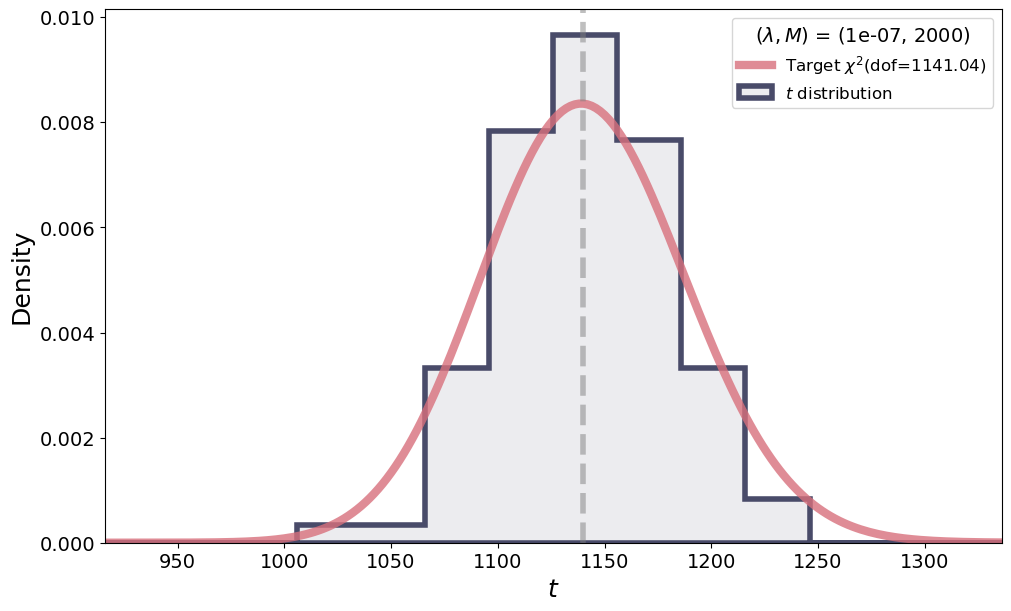

KS p value: 0.2637


In [28]:
l=1e-7;     M=2000
with open('../output/bank_data/Shape_only_nodiff/2024_3_19_17_57_ref_5000_bkg_1000_sig_0_SOn/ttest_time_1e-07_2000.csv') as f:
    t_ref_final = np.array([float(row.split()[0]) for row in f])

df_fit_SO_nodiff, loc, scale = chi2.fit(t_ref_final, floc=0, fscale=1)
t_ref_bins  = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 30)
xgrid_ref   = np.arange(int(np.min(t_ref_final))-100, int(np.max(t_ref_final))+100, 2)

ref_chi2 = chi2(df=df_fit_SO_nodiff)

plot_one_t(
    t_distribution  = t_ref_final,
    t_bins          = t_ref_bins,
    chi2            = ref_chi2,
    chi2_grid       = xgrid_ref,
    show_hist       = True,
    show_error      = False,
    compute_rate    = False,
    err_marker      = "o",
    err_markersize  = 10,
    err_capsize     = 5,
    err_elinewidth  = 4,
    err_capthick    = 4,
    err_color       = "black",
    figsize         = (10, 6),
    fontsize        = 18,
    cms             = False,
    cms_label       = "",
    cms_rlabel      = "",
    hist_ecolor     = ("#494B69", 1.0),
    hist_fcolor     = ("#494B69", 0.1),
    chi2_color      = ("#D8707C", 0.8),
    hist_lw         = 4,
    chi2_lw         = 6,
    hist_type       = "stepfilled",
    hist_label      = "$\it{t}$ distribution",
    chi2_label      = "Target $\chi^2$(dof=%.2f)"%(df_fit_SO_nodiff),
    xlabel          = r"$t$",
    ylabel          = "Density",
    show_plot       = True,
    save_plot       = False,
    plot_name       = "t_distribution_"+str(l)+"_"+str(M),
    plot_path       = "",
    plot_format     = "png",
    return_fig      = False,
    plot_params     = True,
    hyperparams     = str(l)+", "+str(M),
)

_, ks_p_value = stats.kstest(t_ref_final, "chi2", args=(df_fit_SO_nodiff,))
print("KS p value:", np.around(ks_p_value, 4))


<>:37: SyntaxWarning: invalid escape sequence '\c'
<>:37: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_880762/1900354034.py:37: SyntaxWarning: invalid escape sequence '\c'
  chi2_label      = "Target $\chi^2$(dof=%.2f)"%(df_fit_SO_nodiff),


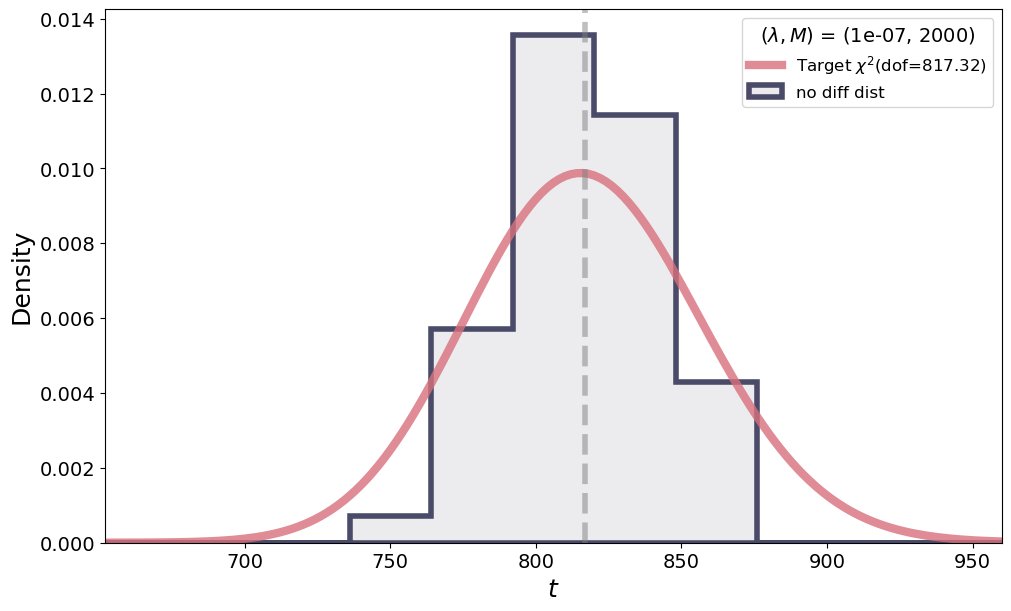

KS p value: 0.1428


In [35]:
l=1e-7;     M=2000
with open('../output/bank_data/Shape_only_nodiff/2024_3_20_12_37_ref_5000_bkg_1000_sig_0_SOn/ttest_time_1e-07_2000.csv') as f:
    t_ref = np.array([float(row.split()[0]) for row in f])[:50]

df_fit_SO_nodiff, _, _ = chi2.fit(t_ref, floc=0, fscale=1)
t_ref_bins  = np.arange(int(np.min(t_ref))-100, int(np.max(t_ref))+100, 28)
xgrid_ref   = np.arange(int(np.min(t_ref))-100, int(np.max(t_ref))+100, 2)

ref_chi2 = chi2(df=df_fit_SO_nodiff)

plot_one_t(
    t_distribution  = t_ref,
    t_bins          = t_ref_bins,
    chi2            = ref_chi2,
    chi2_grid       = xgrid_ref,
    show_hist       = True,
    show_error      = False,
    compute_rate    = False,
    err_marker      = "o",
    err_markersize  = 10,
    err_capsize     = 5,
    err_elinewidth  = 4,
    err_capthick    = 4,
    err_color       = "black",
    figsize         = (10, 6),
    fontsize        = 18,
    cms             = False,
    cms_label       = "",
    cms_rlabel      = "",
    hist_ecolor     = ("#494B69", 1.0),
    hist_fcolor     = ("#494B69", 0.1),
    chi2_color      = ("#D8707C", 0.8),
    hist_lw         = 4,
    chi2_lw         = 6,
    hist_type       = "stepfilled",
    hist_label      = "no diff dist",
    chi2_label      = "Target $\chi^2$(dof=%.2f)"%(df_fit_SO_nodiff),
    xlabel          = r"$t$",
    ylabel          = "Density",
    show_plot       = True,
    save_plot       = False,
    plot_name       = "t_distribution_"+str(l)+"_"+str(M),
    plot_path       = "",
    plot_format     = "png",
    return_fig      = False,
    plot_params     = True,
    hyperparams     = str(l)+", "+str(M),
)

_, ks_p_value = stats.kstest(t_ref, "chi2", args=(df_fit_SO_nodiff,))
print("KS p value:", np.around(ks_p_value, 4))
